# LibCBM versus CBM-CFS3 Stand level testing

In [11]:
import os, json, math
import numpy as np
import pandas as pd
%matplotlib inline


libCBM related imports


In [12]:
from libcbm.test import casegeneration
from libcbm.test.cbm3support import cbm3_simulator
from libcbm.test import simulator
from libcbm.test import poolcomparison

In [13]:
age_interval=5
num_age_classes = 40 #required by cbm3
n_steps = 250
cbm3_exe_path = r"M:\CBM Tools and Development\Builds\CBMBuilds\20190530_growth_increment_fix"
toolbox_path = r"C:\Program Files (x86)\Operational-Scale CBM-CFS3"
archive_index_db_path = r"C:\Program Files (x86)\Operational-Scale CBM-CFS3\Admin\DBs\ArchiveIndex_Beta_Install.mdb"

cbm_defaults_db_path = 'C:\dev\cbm_defaults\cbm_defaults.db'
libcbm_path = r'C:\dev\LibCBM\LibCBM\x64\Debug\LibCBM.dll'

generate random test cases

In [14]:
cases = casegeneration.generate_scenarios(
    random_seed = 2,
    num_cases = 20,
    dbpath = 'C:\dev\cbm_defaults\cbm_defaults.db',
    n_steps=n_steps,
    max_disturbances = 3,
    max_components = 1,
    growth_generator = lambda: casegeneration.get_random_sigmoid_func,
    n_growth_digits = 2,
    age_interval=age_interval,
    max_age=age_interval*num_age_classes)


In [15]:
libcbm_result = simulator.run_libCBM(libcbm_path, cbm_defaults_db_path, cases, n_steps)

In [16]:
project_path = cbm3_simulator.import_cbm3_project(
    name="stand_level_testing",
    cases=cases,
    age_interval=age_interval,
    num_age_classes=num_age_classes,
    nsteps=n_steps,
    cbm_exe_path=cbm3_exe_path,
    toolbox_path=toolbox_path,
    archive_index_db_path=archive_index_db_path)

cbm3_results_path = cbm3_simulator.run_cbm3(
    aidb_path=archive_index_db_path, 
    project_path=project_path,
    toolbox_path=toolbox_path,
    cbm_exe_path=cbm3_exe_path)

cbm3_result = cbm3_simulator.get_cbm3_results(cbm3_results_path)

In [17]:
pools_merged, pool_diffs = poolcomparison.join_pools(libcbm_result["pools"], cbm3_result["pools"], "all")

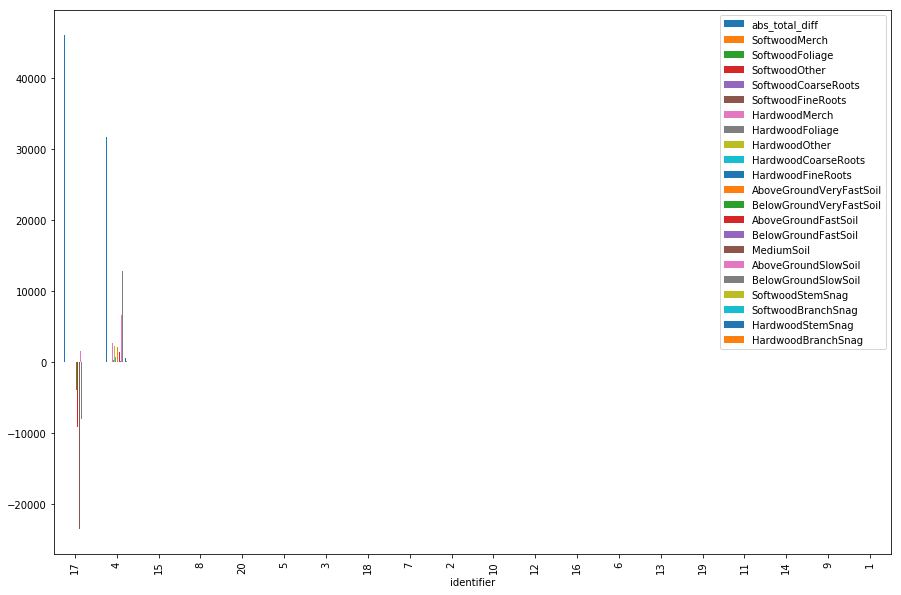

In [18]:
pool_diffs_totals = pool_diffs.drop(columns="timestep")
pool_diffs_totals \
    .groupby("identifier").sum() \
    .sort_values("abs_total_diff", ascending=False) \
    .head(20) \
    .plot(figsize=(15,10), kind="bar")

In [20]:
def plot_diff(id):
    markers = ["o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d"]
    bio_pools = pools_merged[pools_merged["identifier"]==casegeneration.get_classifier_name(id)]
    bio_pools = bio_pools.drop(columns="identifier")
    bio_pools = bio_pools.groupby("timestep").sum()
    ax = bio_pools.plot(figsize=(15,12), title=casegeneration.get_classifier_name(id))
    for i, line in enumerate(ax.get_lines()):
        line.set_marker(markers[i%len(markers)])
    ax.legend(ax.get_lines(), bio_pools.columns, loc='best')
    bio_diffs = pool_diffs[pool_diffs["identifier"]==casegeneration.get_classifier_name(id)]
    bio_diffs.drop(columns="identifier")
    bio_diffs.groupby("timestep").sum() \
        .plot(figsize=(15,12), title=casegeneration.get_classifier_name(id))

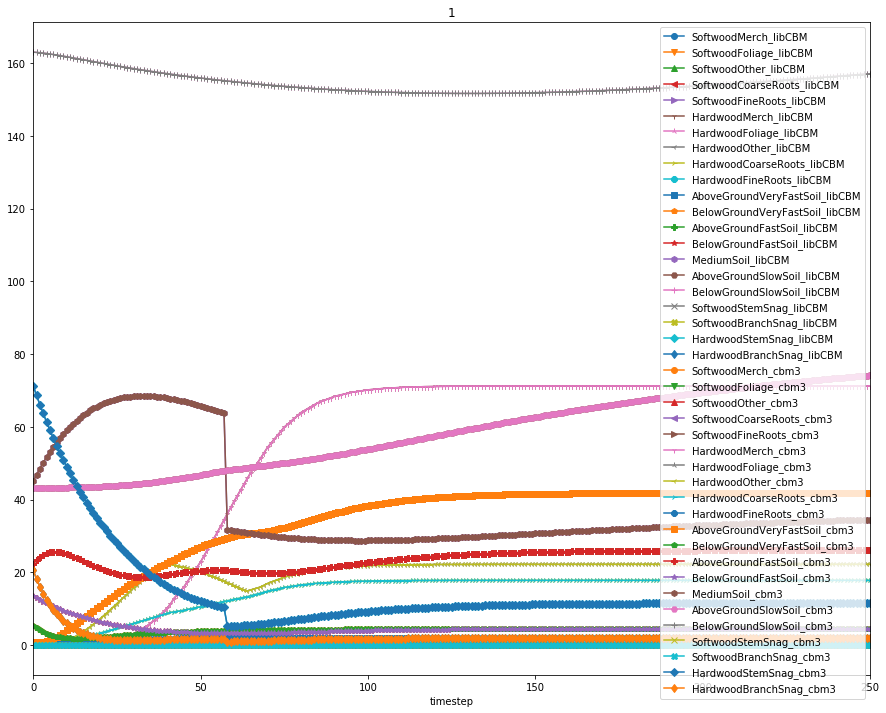

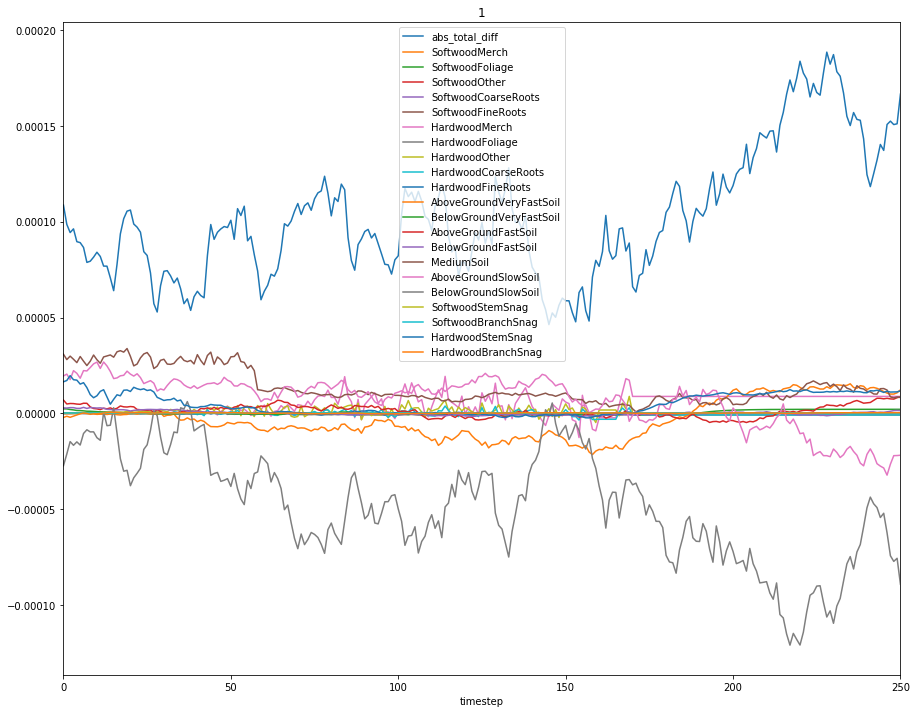

In [31]:
plot_diff(1)

In [30]:
cases[7
     ]

{'id': 8,
 'age': 0,
 'area': 1.0,
 'delay': 0,
 'unfccc_land_class': 0,
 'admin_boundary': 'Ontario',
 'eco_boundary': 'Boreal Shield West',
 'historic_disturbance': 'Wildfire',
 'last_pass_disturbance': 'Wildfire',
 'components': [{'species': 'Flowering dogwood',
   'age_volume_pairs': [(0, 0.0),
    (5, 6.85),
    (10, 13.71),
    (15, 20.56),
    (20, 27.42),
    (25, 34.27),
    (30, 41.13),
    (35, 47.98),
    (40, 54.83),
    (45, 61.69),
    (50, 68.54),
    (55, 75.4),
    (60, 82.25),
    (65, 89.11),
    (70, 95.96),
    (75, 102.81),
    (80, 109.67),
    (85, 116.52),
    (90, 123.38),
    (95, 130.23),
    (100, 137.09),
    (105, 143.94),
    (110, 150.8),
    (115, 157.65),
    (120, 164.5),
    (125, 171.36),
    (130, 178.21),
    (135, 185.07),
    (140, 191.92),
    (145, 198.78),
    (150, 205.63),
    (155, 212.48),
    (160, 219.34),
    (165, 226.19),
    (170, 233.05),
    (175, 239.9),
    (180, 246.76),
    (185, 253.61),
    (190, 260.46),
    (195, 267.32)

In [13]:
libcbm_result.keys()

dict_keys(['pools', 'spinup_debug'])

In [17]:
libCBM_spinup_debug

In [15]:

libCBM_spinup_debug = libcbm_result["spinup_debug"]

In [16]:
libCBM_spinup_debug[libCBM_spinup_debug["index"]==0].groupby("iteration").sum().plot(figsize=(10,10))

TypeError: 'NoneType' object is not subscriptable